In [110]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data = pd.read_csv("../Dataset/StudentPlacement.csv")

In [112]:
data.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
0,67,82,77,40,19,40,48,6,9,9,Javascript,HTML/CSS,Web Developer
1,22,45,89,75,8,36,54,2,8,3,HTML/CSS,Photoshop,UI/UX
2,34,45,39,49,24,36,62,4,8,4,Photoshop,GitHub,UI/UX
3,73,46,81,89,72,79,78,6,6,1,Cisco Packet tracer,Wire Shark,Network Engineer
4,32,22,51,39,23,17,81,4,10,5,Javascript,Photoshop,UI/UX


In [113]:
data.shape

(808, 13)

In [114]:
data[data.duplicated(data.columns[:-1])]

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile


In [115]:
data["Profile"].unique()

array(['Web Developer', 'UI/UX', 'Network Engineer', 'DATA Scientist',
       'Tech Support', 'Database Administrator', 'Software Engineer'],
      dtype=object)

In [116]:
#Extracting the Numerical Features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
catagorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [117]:
#Creating a Numerical features dataset to find out different trends
numerical_data = pd.DataFrame(np.array(data[numerical_features]), columns = numerical_features)

In [118]:
numerical_data.nunique() 

DSA                94
DBMS               95
OS                 91
CN                 96
Mathmetics         99
Aptitute           87
Comm               51
Problem Solving    10
Creative            9
Hackathons         11
dtype: int64

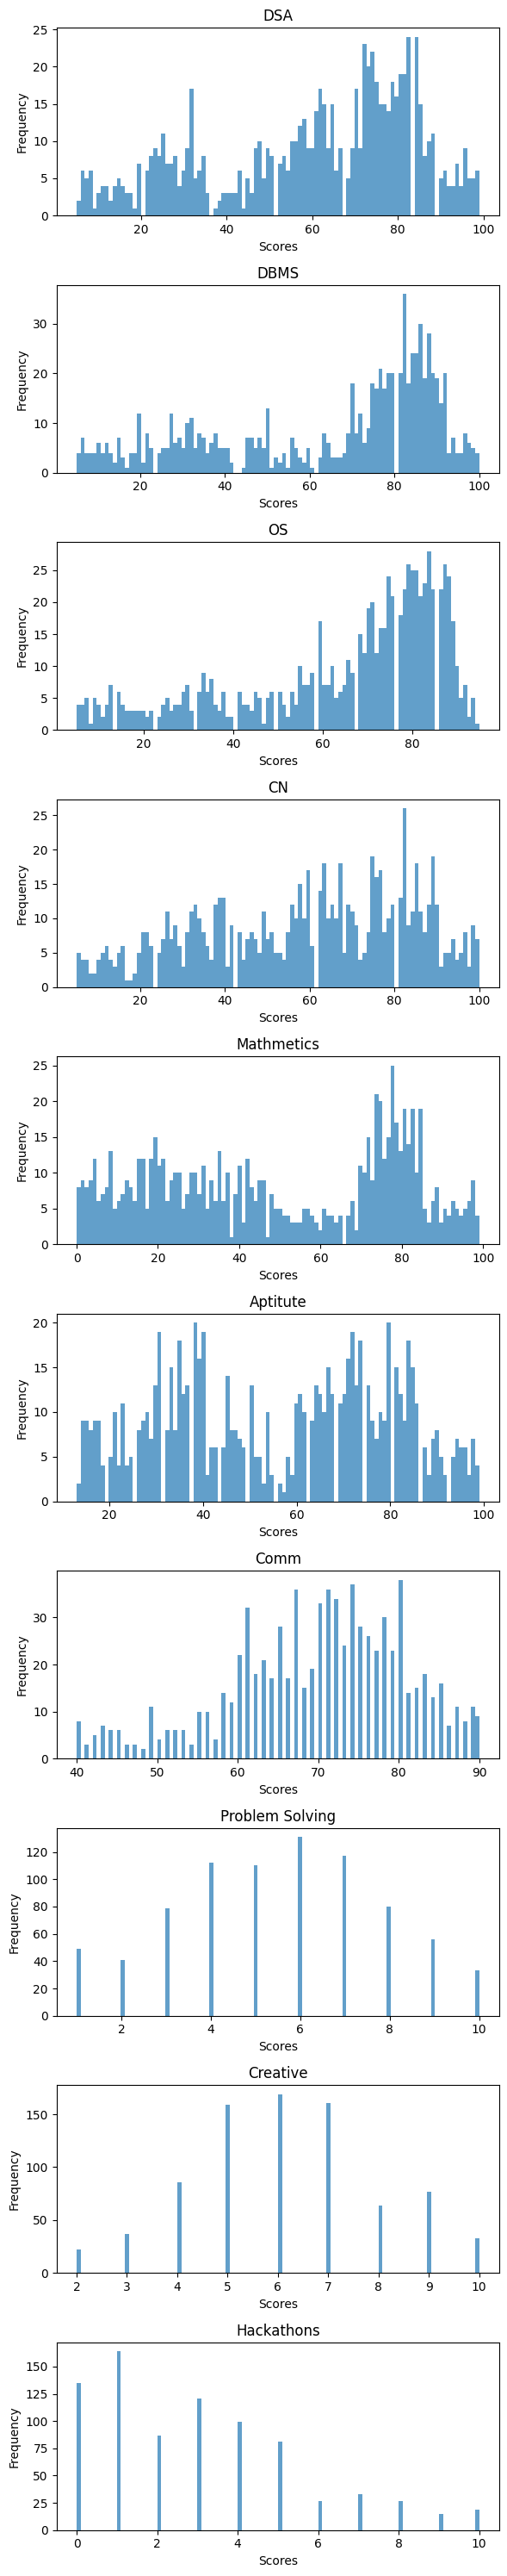

In [119]:
fig, ax = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(6, 3 * len(numerical_features)))  

for i in range(len(numerical_features)):
    ax[i].hist(numerical_data[numerical_features[i]], bins=100, alpha=0.7)  
    ax[i].set_title(numerical_features[i])  
    ax[i].set_xlabel("Scores")  
    ax[i].set_ylabel("Frequency")

plt.tight_layout() 
plt.show()

<Axes: >

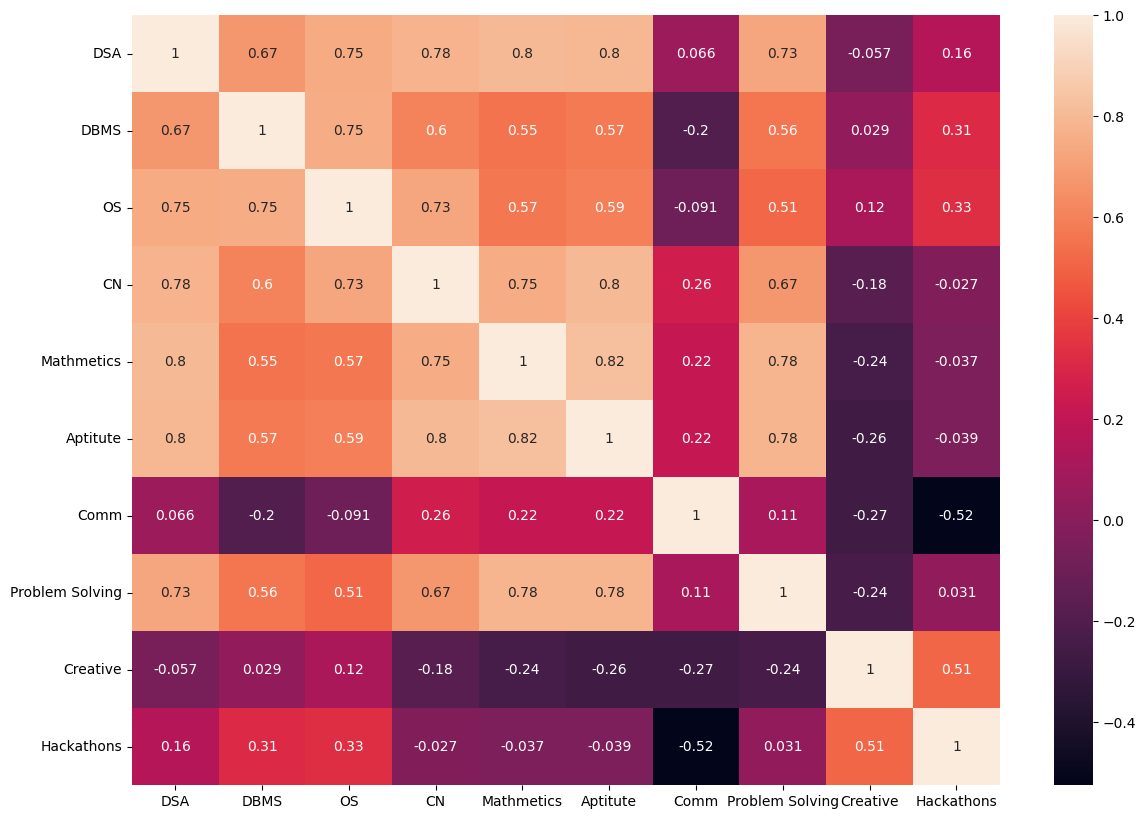

In [120]:
fig, ax = plt.subplots(figsize=(14,len(numerical_data.columns)))
sns.heatmap(numerical_data.corr(), annot = True,  ax = ax)

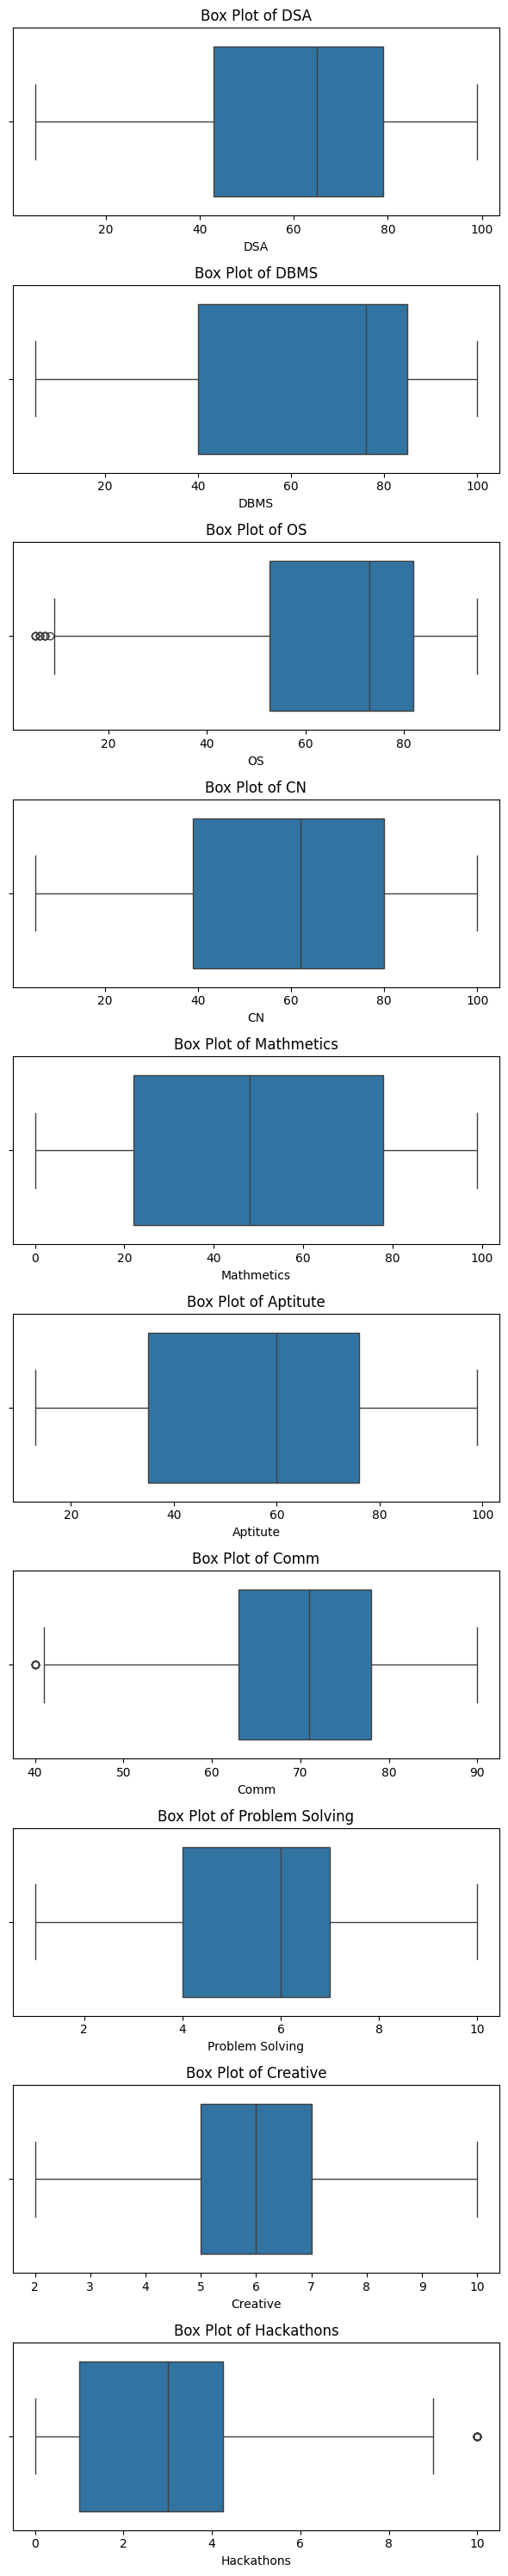

In [121]:
features = numerical_data.columns
n_rows = len(features)

fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(6, 3 * n_rows))


for i, feature in enumerate(features):
    if pd.api.types.is_numeric_dtype(numerical_data[feature]):
        sns.boxplot(x=numerical_data[feature], ax=axes[i])  
        axes[i].set_title(f'Box Plot of {feature}')
    else:
        print(f"Skipping '{feature}' as it is not a valid numeric column")

plt.tight_layout()
plt.show()

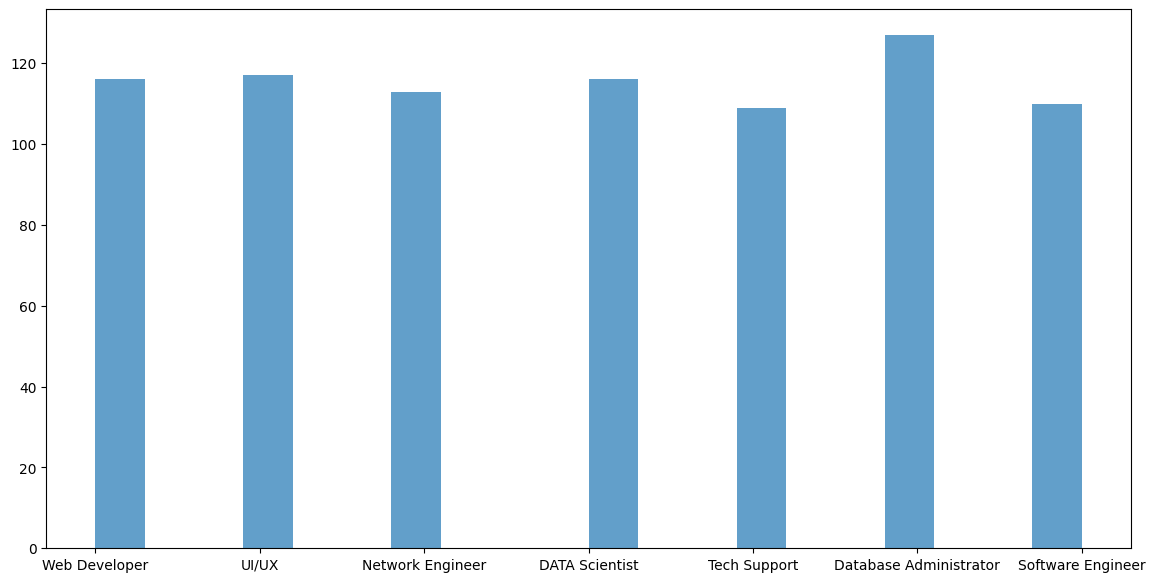

In [122]:
fig = plt.figure(figsize = (14,7))
plt.hist(data["Profile"], bins = 20, alpha = 0.7)
plt.show()

In [123]:
df = numerical_data

In [124]:
l = list(data["Skill 1"].unique())
l.sort()
print(l)

['Angular', 'Ansible', 'BASH/SHELL', 'C/C++', 'Cisco Packet tracer', 'Deep Learning', 'Figma', 'GitHub', 'HTML/CSS', 'Java', 'Javascript', 'Linux', 'MYSQL', 'Machine Learning', 'Node.js', 'Oracle', 'Photoshop', 'Python', 'Pytorch', 'R', 'React', 'Tensorflow', 'Wire Shark']


In [125]:
skills = {}
for i in range(len(l)):
    skills[l[i]] = i

In [126]:
skills

{'Angular': 0,
 'Ansible': 1,
 'BASH/SHELL': 2,
 'C/C++': 3,
 'Cisco Packet tracer': 4,
 'Deep Learning': 5,
 'Figma': 6,
 'GitHub': 7,
 'HTML/CSS': 8,
 'Java': 9,
 'Javascript': 10,
 'Linux': 11,
 'MYSQL': 12,
 'Machine Learning': 13,
 'Node.js': 14,
 'Oracle': 15,
 'Photoshop': 16,
 'Python': 17,
 'Pytorch': 18,
 'R': 19,
 'React': 20,
 'Tensorflow': 21,
 'Wire Shark': 22}

In [127]:
def skill_encoder(skill):
    return skills[skill]

In [128]:
decode_skill = {}
for i in range(len(l)):
    decode_skill[i] = l[i]
decode_skill

{0: 'Angular',
 1: 'Ansible',
 2: 'BASH/SHELL',
 3: 'C/C++',
 4: 'Cisco Packet tracer',
 5: 'Deep Learning',
 6: 'Figma',
 7: 'GitHub',
 8: 'HTML/CSS',
 9: 'Java',
 10: 'Javascript',
 11: 'Linux',
 12: 'MYSQL',
 13: 'Machine Learning',
 14: 'Node.js',
 15: 'Oracle',
 16: 'Photoshop',
 17: 'Python',
 18: 'Pytorch',
 19: 'R',
 20: 'React',
 21: 'Tensorflow',
 22: 'Wire Shark'}

In [129]:
df["Skill 1"] = data["Skill 1"].apply(skill_encoder)

In [130]:
df["Skill 1"]

0      10
1       8
2      16
3       4
4      10
       ..
803    14
804     3
805    17
806    18
807     7
Name: Skill 1, Length: 808, dtype: int64

In [131]:
df["Skill 2"] = data["Skill 2"].apply(skill_encoder)

In [132]:
df["Skill 2"]

0       8
1      16
2       7
3      22
4      16
       ..
803     0
804    11
805    12
806    13
807    16
Name: Skill 2, Length: 808, dtype: int64

In [133]:
jobs = list(data["Profile"].unique())
jobs.sort()
profile = {}
for i in range(len(jobs)):
    profile[jobs[i]] = i
print(profile)

{'DATA Scientist': 0, 'Database Administrator': 1, 'Network Engineer': 2, 'Software Engineer': 3, 'Tech Support': 4, 'UI/UX': 5, 'Web Developer': 6}


In [134]:
def Encoder(job):
    return profile[job]

In [135]:
df["Profile"] = data["Profile"].apply(Encoder)

In [136]:
df["Profile"]

0      6
1      5
2      5
3      2
4      5
      ..
803    6
804    1
805    3
806    0
807    5
Name: Profile, Length: 808, dtype: int64

In [137]:
decode_job = {}
for i in range(len(jobs)):
    decode_job[i] = jobs[i]

decode_job

{0: 'DATA Scientist',
 1: 'Database Administrator',
 2: 'Network Engineer',
 3: 'Software Engineer',
 4: 'Tech Support',
 5: 'UI/UX',
 6: 'Web Developer'}

In [138]:
# from sklearn.preprocessing import LabelEncoder

In [139]:
# encoder = LabelEncoder()

In [140]:
# for feature in catagorical_features:
#     df[feature] = pd.Series(encoder.fit_transform(data[feature]))

In [141]:
df.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
0,67,82,77,40,19,40,48,6,9,9,10,8,6
1,22,45,89,75,8,36,54,2,8,3,8,16,5
2,34,45,39,49,24,36,62,4,8,4,16,7,5
3,73,46,81,89,72,79,78,6,6,1,4,22,2
4,32,22,51,39,23,17,81,4,10,5,10,16,5


In [142]:
df.describe()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,60.250000,64.095297,64.407178,58.727723,49.652228,56.113861,69.618812,5.501238,6.150990,3.014851,10.707921,10.127475,2.970297
std,24.036669,26.562723,23.095595,24.652582,29.737790,23.606741,11.165012,2.339785,1.865216,2.562193,6.068901,5.845795,2.017669
min,5.000000,5.000000,5.000000,5.000000,0.000000,13.000000,40.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,40.000000,52.750000,39.000000,22.000000,35.000000,63.000000,4.000000,5.000000,1.000000,7.000000,6.000000,1.000000
50%,65.000000,76.000000,73.000000,62.000000,48.000000,60.000000,71.000000,6.000000,6.000000,3.000000,10.000000,9.000000,3.000000
75%,79.000000,85.000000,82.000000,80.000000,78.000000,76.000000,78.000000,7.000000,7.000000,4.250000,17.000000,15.000000,5.000000
max,99.000000,100.000000,95.000000,100.000000,99.000000,99.000000,90.000000,10.000000,10.000000,10.000000,22.000000,22.000000,6.000000


In [143]:
X = df.drop("Profile", axis = 1)
y = df["Profile"]

In [144]:
X.shape

(808, 12)

In [145]:
from sklearn.ensemble import RandomForestClassifier

<Axes: >

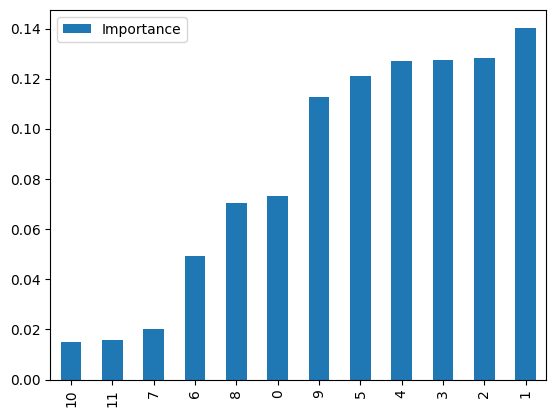

In [146]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
importance = model.feature_importances_

imp_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importance" : importance })
imp_df.set_index("Importance")

imp_df = imp_df.sort_values("Importance")

imp_df.plot.bar()

In [147]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

In [148]:
from matplotlib.legend_handler import HandlerLine2D

In [149]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify=y)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 15, 17, 20],
    'min_samples_split': [10, 12, 15, 17, 20],
    'max_leaf_nodes': [20, 25, 30, 35, 40],
    'min_samples_leaf': [2, 5, 7, 10],
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17, 20],
                         'max_leaf_nodes': [20, 25, 30, 35, 40],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [10, 12, 15, 17, 20]},
             scoring='accuracy')

In [155]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [156]:
# Get the best model with the best hyperparameters
DT_Model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_leaf_nodes = 6)

In [157]:
DT_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=6)

In [158]:
test_accuracy = DT_Model.score(X_test, y_test)

In [159]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 82.72


In [160]:
y_pred = DT_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.00      0.00      0.00        13
           2       1.00      1.00      1.00        11
           3       0.69      1.00      0.81        11
           4       1.00      1.00      1.00        11
           5       1.00      0.92      0.96        12
           6       0.73      1.00      0.85        11

    accuracy                           0.83        81
   macro avg       0.73      0.85      0.78        81
weighted avg       0.72      0.83      0.76        81



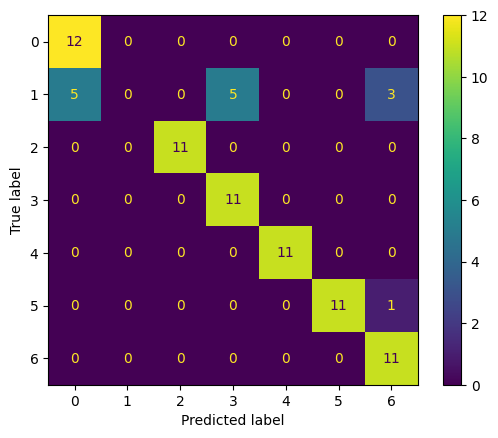

In [161]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

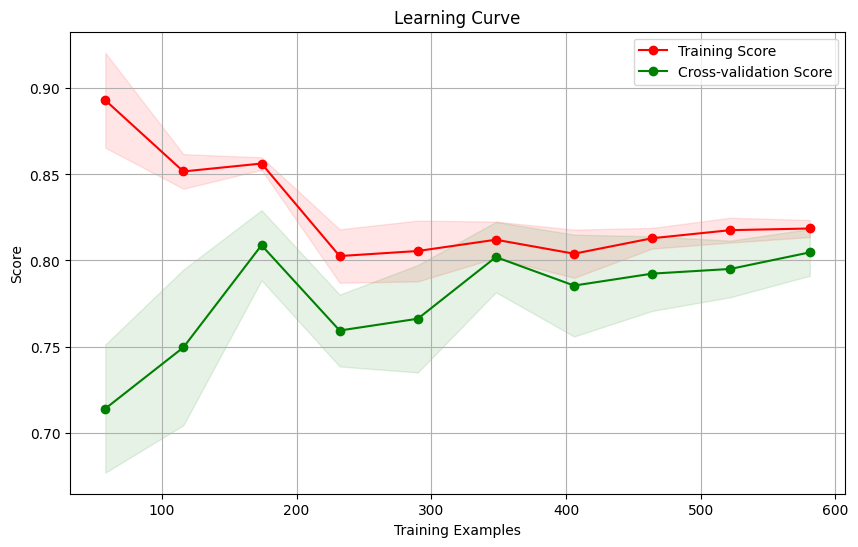

In [162]:
train_sizes, train_scores, test_scores = learning_curve(
    DT_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

<h1>Random Forest</h1>

In [163]:
RF_Model = RandomForestClassifier(bootstrap= False, max_depth= 5, max_leaf_nodes = 3 ,n_estimators = 100)
RF_Model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, max_leaf_nodes=3)

In [164]:
test_accuracy = RF_Model.score(X_test, y_test)

In [165]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 95.06


In [166]:
y_pred = RF_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      0.85      0.92        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        11
           4       0.92      1.00      0.96        11
           5       1.00      0.92      0.96        12
           6       0.92      1.00      0.96        11

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



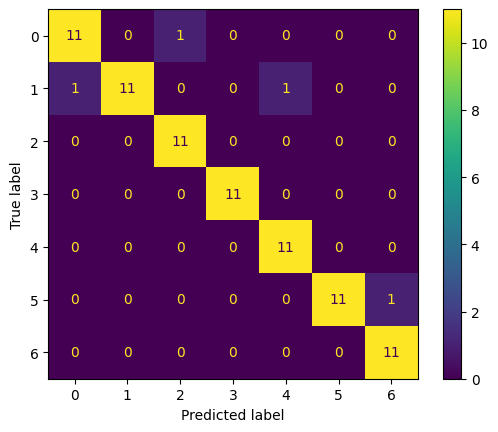

In [167]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

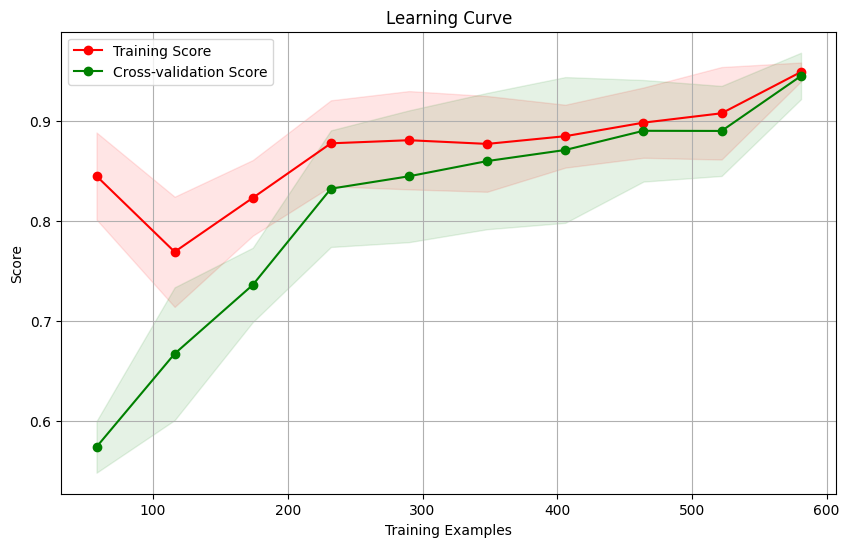

In [168]:
train_sizes, train_scores, test_scores = learning_curve(
    RF_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
GD_Model = GradientBoostingClassifier(
    n_estimators=50,  
    learning_rate=0.1,  
    max_depth=2,   
)

# Train the model on your data
GD_Model.fit(X_train, y_train)

# Make predictions
y_pred = GD_Model.predict(X_test)


In [171]:
test_accuracy = GD_Model.score(X_test, y_test)

In [172]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 96.3


In [173]:
y_pred = GD_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.86      0.92      0.89        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12
           6       1.00      0.91      0.95        11

    accuracy                           0.96        81
   macro avg       0.97      0.96      0.97        81
weighted avg       0.96      0.96      0.96        81



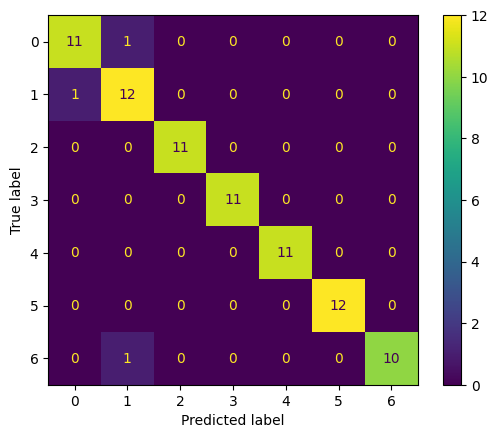

In [174]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

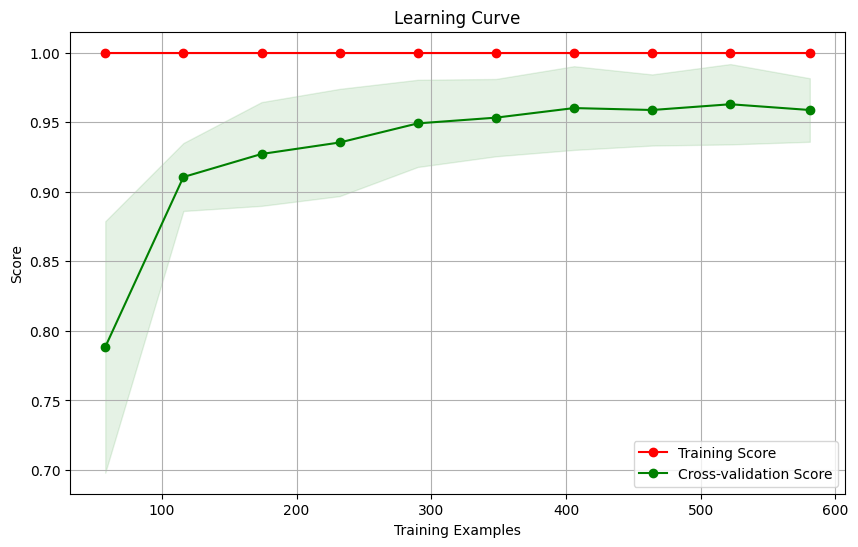

In [175]:
train_sizes, train_scores, test_scores = learning_curve(
    GD_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
LR_Model = LogisticRegression(C=0.1, penalty = "l1", solver="liblinear")

# Train the model on your data (X_train and y_train)
LR_Model.fit(X_train, y_train)

# Make predictions
y_pred = LR_Model.predict(X_test)

In [178]:
test_accuracy = LR_Model.score(X_test, y_test)

In [179]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 95.06


In [180]:
y_pred = LR_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.86      0.92      0.89        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12
           6       1.00      0.82      0.90        11

    accuracy                           0.95        81
   macro avg       0.96      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



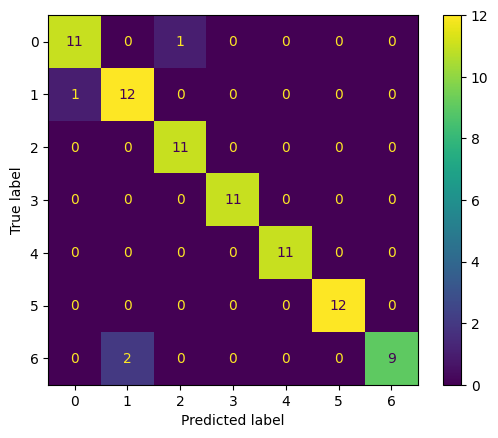

In [181]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

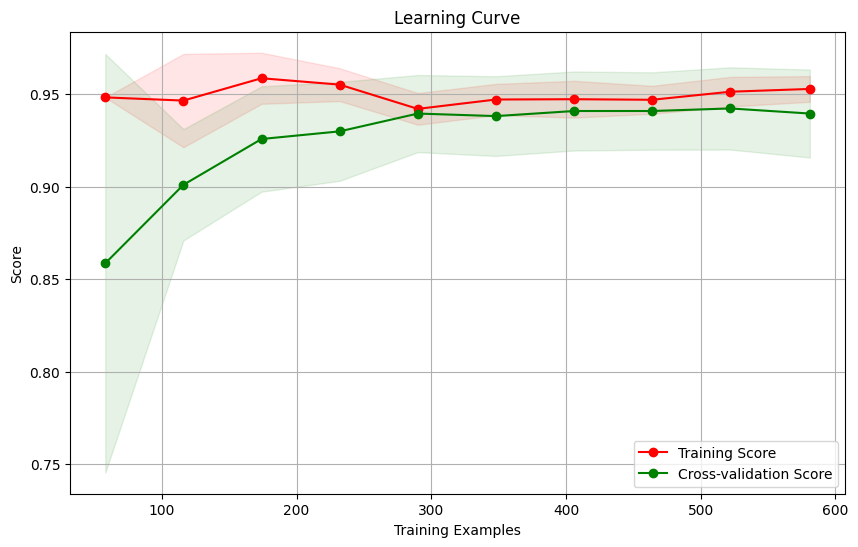

In [182]:
train_sizes, train_scores, test_scores = learning_curve(
    LR_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
Knn_Model = KNeighborsClassifier(n_neighbors=3)
Knn_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [185]:
test_accuracy = Knn_Model.score(X_test, y_test)

In [186]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 100.0


In [187]:
y_pred = Knn_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        11

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



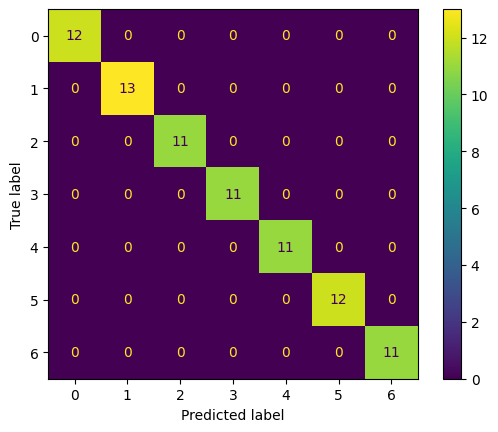

In [188]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

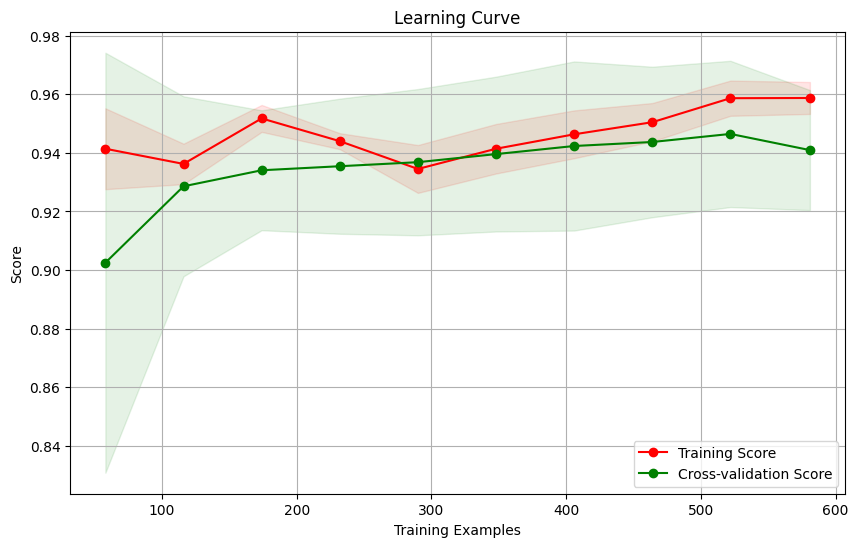

In [189]:
train_sizes, train_scores, test_scores = learning_curve(
    Knn_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [190]:
from sklearn.svm import SVC

In [191]:
Svm_Model = SVC(random_state=42) 

In [192]:
Svm_Model.fit(X_train, y_train)

SVC(random_state=42)

In [193]:
test_accuracy = Svm_Model.score(X_test, y_test)

In [194]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 98.77


In [195]:
y_pred = Svm_Model.predict(X_test)
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        11

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



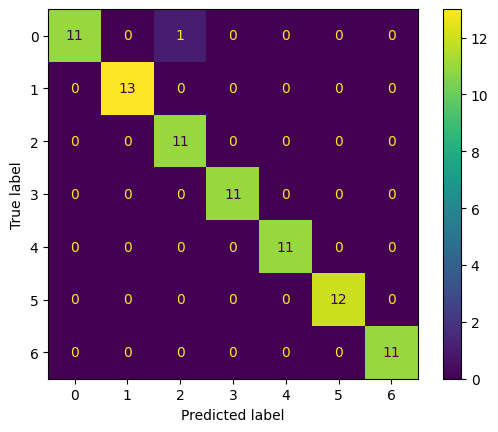

In [196]:
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

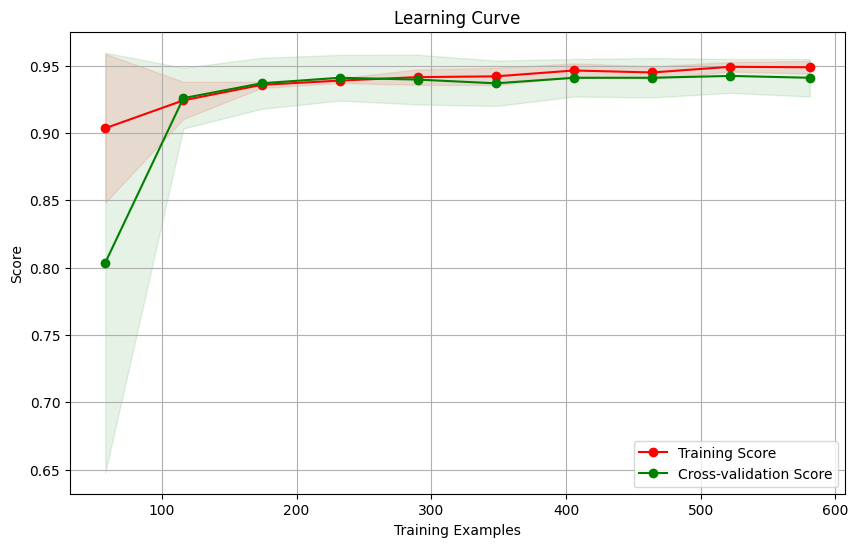

In [197]:
train_sizes, train_scores, test_scores = learning_curve(
    Svm_Model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [198]:
df.columns

Index(['DSA', 'DBMS', 'OS', 'CN', 'Mathmetics', 'Aptitute', 'Comm',
       'Problem Solving', 'Creative', 'Hackathons', 'Skill 1', 'Skill 2',
       'Profile'],
      dtype='object')

In [199]:
l

['Angular',
 'Ansible',
 'BASH/SHELL',
 'C/C++',
 'Cisco Packet tracer',
 'Deep Learning',
 'Figma',
 'GitHub',
 'HTML/CSS',
 'Java',
 'Javascript',
 'Linux',
 'MYSQL',
 'Machine Learning',
 'Node.js',
 'Oracle',
 'Photoshop',
 'Python',
 'Pytorch',
 'R',
 'React',
 'Tensorflow',
 'Wire Shark']

In [200]:
def test():
    dsa = int(input("Enter The Number Of Dsa: "))
    Dbms = int((input("Enter the Number of DBMS: ")))
    os = int((input("Enter the Number of OS: ")))
    cn = int((input("Enter the Number of CN: ")))
    math = int((input("Enter the Number of Math: ")))
    Apt = int((input("Enter the Number of Aptitude: ")))
    comm = int((input("Enter the Number of Comm: ")))
    ps = int((input("Enter the Points for Problem Solving: ")))
    creat = int((input("Enter the Points of Creativity: ")))
    hack = int((input("Enter the Number of Hackathon: ")))
    
    print('Select Top 2 Skill')
    for i,j in skills.items():
        print(j, " : ", i)
    skill_1 = skill_encoder(l[int(input("Choose First Skill"))])
    skill_2 = skill_encoder(l[int(input("Choose Second Skill"))])

    inp = np.array([dsa, Dbms, os, cn, math, Apt, comm, ps, creat, hack, skill_1,skill_2])
    inp = inp.reshape(1, -1) 
    
    # Make predictions
    predicted_label = {
        "Decision Tree" : DT_Model.predict(inp), 
        "Random Forest" : RF_Model.predict(inp), 
        "Gradient Boosting" : GD_Model.predict(inp), 
        "Linear Regression" :  LR_Model.predict(inp), 
        "KNN" : Knn_Model.predict(inp),
        "Support Vector Machine" : Svm_Model.predict(inp)
    }
    for i,j in predicted_label.items():
        decoded_label = decode_job[tuple(j)[0]]
        print(i," : ",decoded_label)

In [201]:
test()

Select Top 2 Skill
0  :  Angular
1  :  Ansible
2  :  BASH/SHELL
3  :  C/C++
4  :  Cisco Packet tracer
5  :  Deep Learning
6  :  Figma
7  :  GitHub
8  :  HTML/CSS
9  :  Java
10  :  Javascript
11  :  Linux
12  :  MYSQL
13  :  Machine Learning
14  :  Node.js
15  :  Oracle
16  :  Photoshop
17  :  Python
18  :  Pytorch
19  :  R
20  :  React
21  :  Tensorflow
22  :  Wire Shark
Decision Tree  :  Tech Support
Random Forest  :  Tech Support
Gradient Boosting  :  Tech Support
Linear Regression  :  Tech Support
KNN  :  Tech Support
Support Vector Machine  :  Tech Support


In [202]:
from joblib import dump, load

In [203]:
# dump(RF_Model, 'random_forest_model.joblib')
# dump(DT_Model, "decision_tree_model.jolib")
# dump(GD_Model, "gradient_boosting_model.jolib")
# dump(LR_Model, "linear_gradient_model.jolib")
# dump(Knn_Model, "KNN-model.jolib")
# dump(Svm_Model, "support_vector_model.jolib")